In [ ]:
import pandas as pd
import sqlite3


url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Credit.csv"

try:

    df_real = pd.read_csv(url)


    df_real.columns = [c.lower().replace(' ', '_').replace('.', '_') for c in df_real.columns]


    conn = sqlite3.connect('banca_real.db')
    df_real.to_sql('clientes_credito', conn, if_exists='replace', index=False)

    print("✅ ¡Éxito! Dataset cargado y tabla 'clientes_credito' lista en SQL.")
    display(df_real.head())

except Exception as e:
    print(f"❌ Error al cargar: {e}")

✅ ¡Éxito! Dataset cargado y tabla 'clientes_credito' lista en SQL.


,unnamed:_0,income,limit,rating,cards,age,education,gender,student,married,ethnicity,balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:

df_real['uso_credito'] = (df_real['cards'] * 1000 / df_real['limit'])


import sqlite3
conn = sqlite3.connect('banca_real.db')
df_real.to_sql('clientes_credito', conn, if_exists='replace', index=False)

print("Datos reales subidos a SQL.")

Datos reales subidos a SQL.


In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('banca_real.db')

query = """
SELECT
    CASE
        WHEN student = 'Yes' THEN 'Estudiante'
        ELSE 'Profesional'
    END as tipo_cliente,
    AVG(income) as ingreso_promedio,
    AVG(rating) as score_promedio,
    COUNT(*) as cantidad_personas
FROM clientes_credito
GROUP BY tipo_cliente
"""

df_result = pd.read_sql(query, conn)
display(df_result)

,tipo_cliente,ingreso_promedio,score_promedio,cantidad_personas
0,Estudiante,47.292050,354.000000,40
1,Profesional,44.988533,355.044444,360


In [ ]:

query = """
SELECT
    CASE WHEN student = 'Yes' THEN 'Estudiante' ELSE 'Profesional' END as tipo_cliente,
    AVG(income) as ingreso_promedio,
    AVG(rating) as score_promedio,
    COUNT(*) as cantidad_personas
FROM clientes_credito
GROUP BY tipo_cliente
"""

df_resultado = pd.read_sql(query, conn)

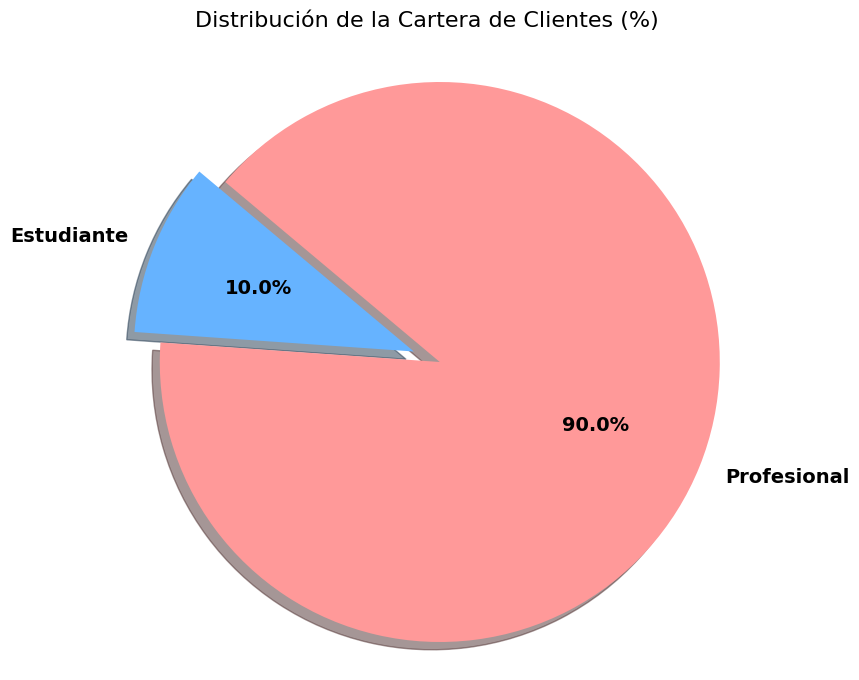

In [ ]:
import matplotlib.pyplot as plt


labels = df_resultado['tipo_cliente']
sizes = df_resultado['cantidad_personas']
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)


plt.figure(figsize=(8, 8))
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140,
        textprops={'fontsize': 14, 'weight': 'bold'})


plt.title('Distribución de la Cartera de Clientes (%)', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

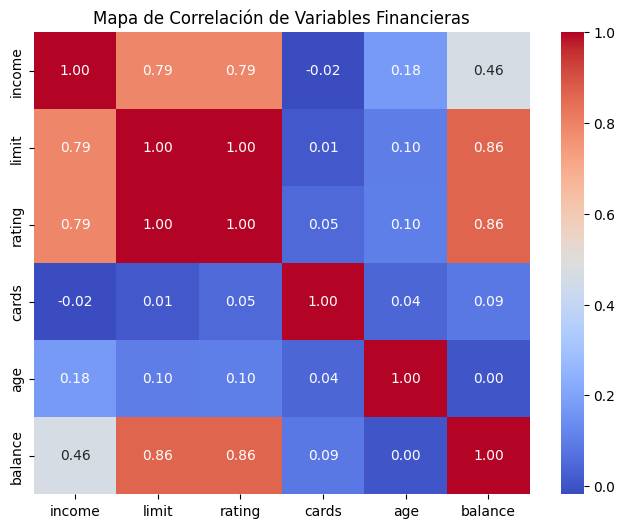

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlacion = df_real[['income', 'limit', 'rating', 'cards', 'age', 'balance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Variables Financieras')
plt.show()

In [ ]:
import pandas as pd


query_riesgo = """
SELECT
    income,
    rating,
    balance,
    CASE
        WHEN rating > 600 AND balance < 500 THEN 'Riesgo Bajo (Premium)'
        WHEN rating BETWEEN 300 AND 600 THEN 'Riesgo Medio'
        ELSE 'Riesgo Alto (Seguimiento)'
    END as categoria_riesgo
FROM clientes_credito
ORDER BY rating DESC
"""

df_riesgo = pd.read_sql(query_riesgo, conn)


print("Análisis de Matriz de Riesgo Bancario:")
display(df_riesgo.head(10))

Análisis de Matriz de Riesgo Bancario:


,income,rating,balance,categoria_riesgo
0,182.728,982,1999,Riesgo Alto (Seguimiento)
1,186.634,949,1809,Riesgo Alto (Seguimiento)
2,180.682,832,1405,Riesgo Alto (Seguimiento)
3,152.298,828,1779,Riesgo Alto (Seguimiento)
4,140.672,817,1677,Riesgo Alto (Seguimiento)
5,158.889,805,1448,Riesgo Alto (Seguimiento)
6,160.231,754,1192,Riesgo Alto (Seguimiento)
7,121.834,750,1573,Riesgo Alto (Seguimiento)
8,135.118,747,1393,Riesgo Alto (Seguimiento)
9,130.209,730,1426,Riesgo Alto (Seguimiento)


In [ ]:
query_resumen = """
SELECT
    CASE
        WHEN rating > 600 AND balance < 500 THEN 'Riesgo Bajo (Premium)'
        WHEN rating BETWEEN 300 AND 600 THEN 'Riesgo Medio'
        ELSE 'Riesgo Alto (Seguimiento)'
    END as categoria_riesgo,
    COUNT(*) as cantidad_clientes,
    AVG(income) as ingreso_promedio
FROM clientes_credito
GROUP BY categoria_riesgo
"""
df_resumen = pd.read_sql(query_resumen, conn)
display(df_resumen)

,categoria_riesgo,cantidad_clientes,ingreso_promedio
0,Riesgo Alto (Seguimiento),189,41.307847
1,Riesgo Medio,211,48.722137


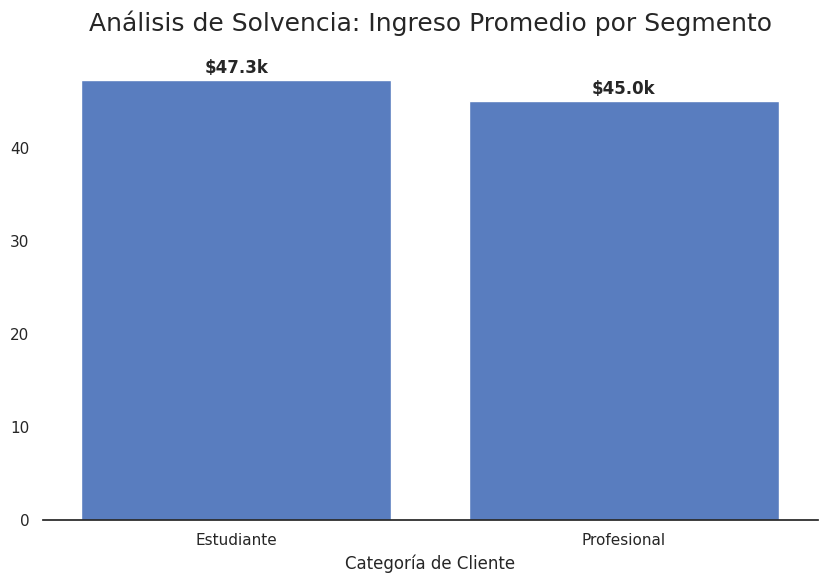

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo profesional
sns.set_theme(style="white", palette="muted")
plt.figure(figsize=(10, 6))

# Creamos el gráfico con personalización avanzada
ax = sns.barplot(x='tipo_cliente', y='ingreso_promedio', data=df_resultado)

# Añadimos etiquetas de datos sobre las barras
for p in ax.patches:
    ax.annotate(f'${p.get_height():.1f}k',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, fontweight='bold')

# Limpiamos el gráfico
sns.despine(left=True)
plt.title('Análisis de Solvencia: Ingreso Promedio por Segmento', fontsize=18, pad=20)
plt.ylabel('') # Quitamos el nombre del eje para limpieza
plt.xlabel('Categoría de Cliente', fontsize=12)
plt.show()

/tmp/ipython-input-2061499228.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(x='categoria_riesgo', y='cant', data=df_mora, ax=axes[0, 1], palette='viridis')
/tmp/ipython-input-2061499228.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='student', y='balance', data=df_real, ax=axes[1, 1], palette=[color_paleta[0], color_paleta[1]], width=0.5)


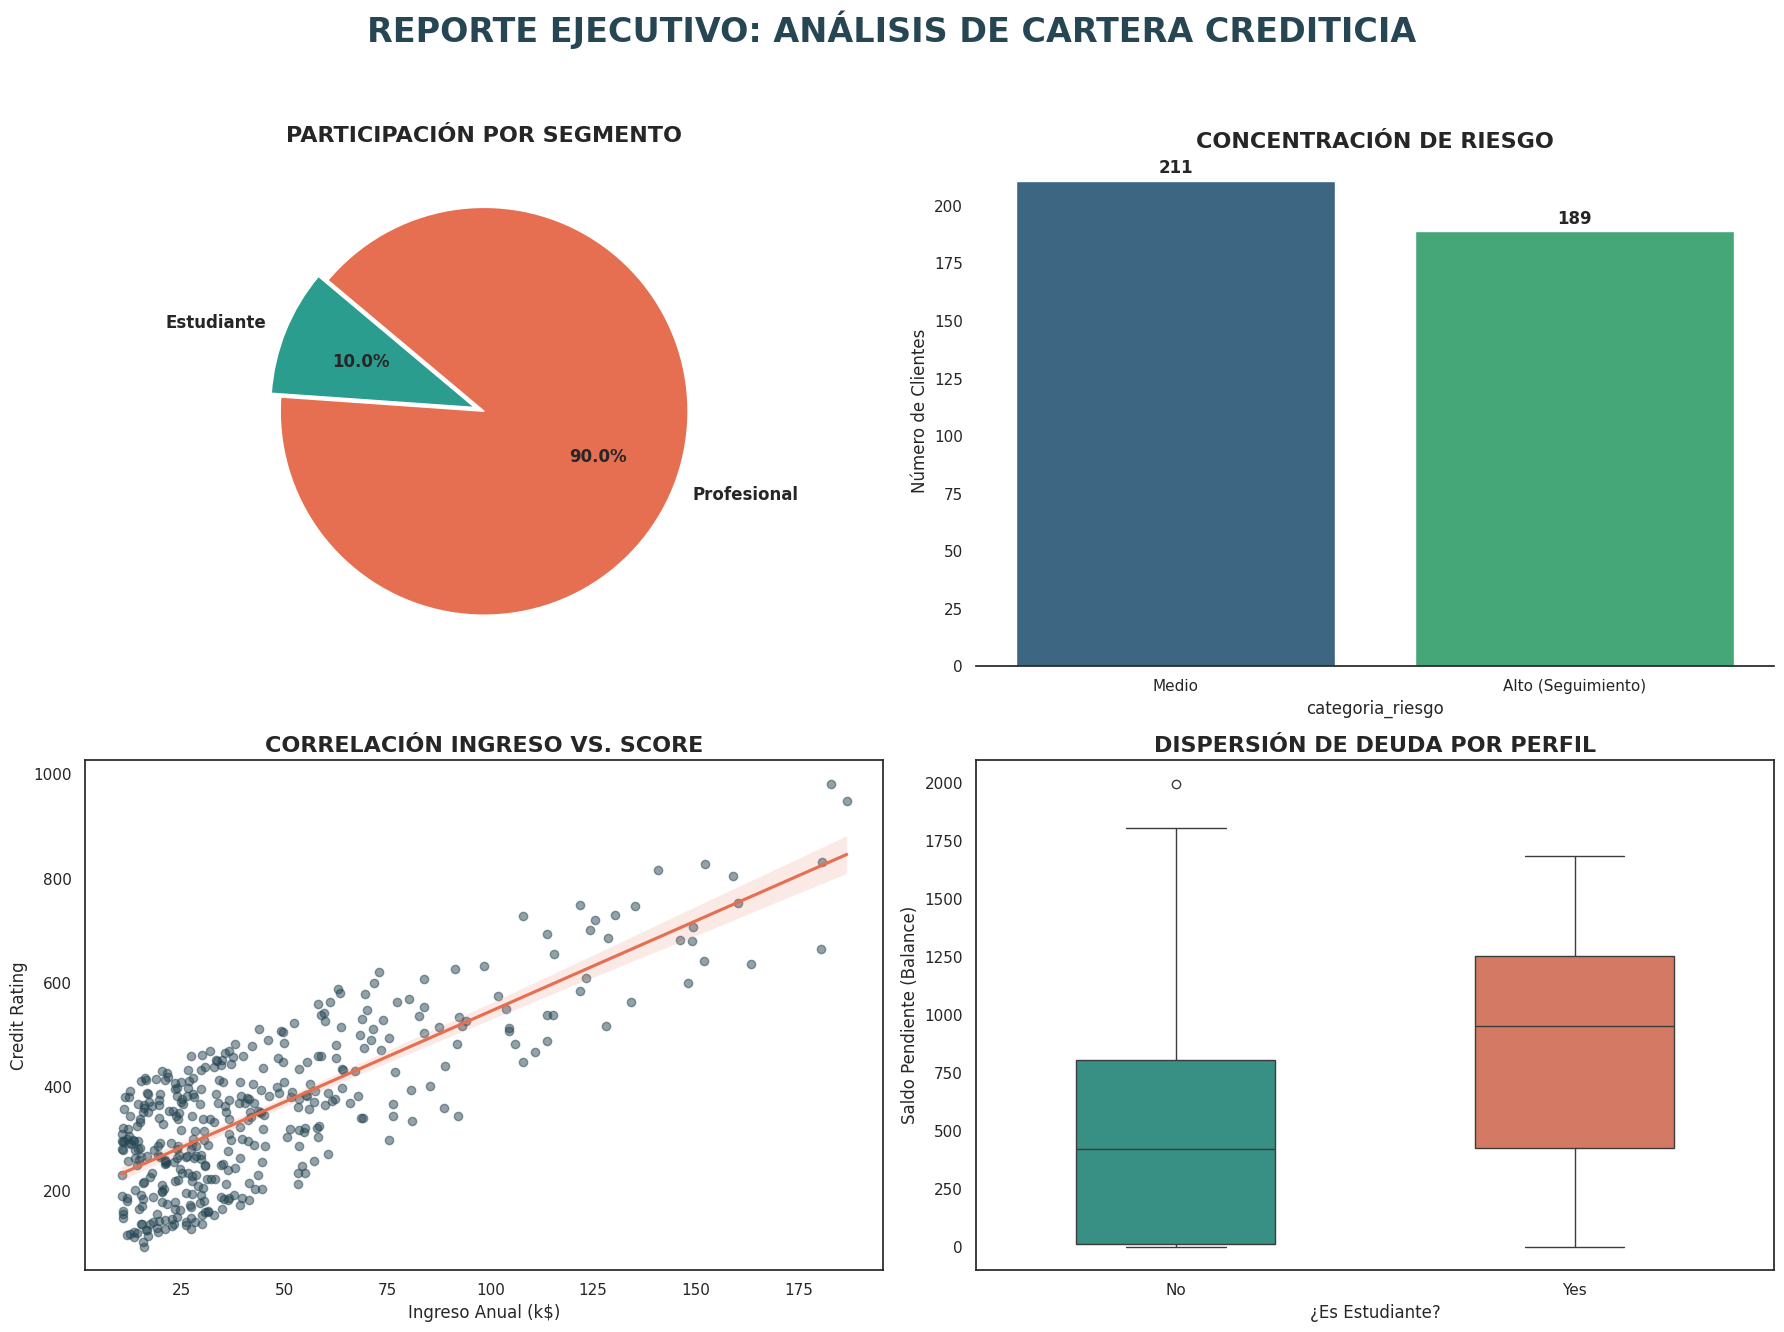

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Configuración de estilo global
sns.set_theme(style="white")
plt.rcParams['font.family'] = 'sans-serif'
color_paleta = ["#2a9d8f", "#e76f51", "#264653", "#f4a261"] # Paleta profesional

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('REPORTE EJECUTIVO: ANÁLISIS DE CARTERA CREDITICIA', fontsize=24, fontweight='bold', color='#264653', y=0.98)

# --- GRÁFICO 1: Composición de Clientes (Pie Chart) ---
etiquetas = df_resultado['tipo_cliente']
valores = df_resultado['cantidad_personas']
axes[0, 0].pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140,
               colors=[color_paleta[0], color_paleta[1]], explode=(0.05, 0), shadow=False,
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 0].set_title('PARTICIPACIÓN POR SEGMENTO', fontsize=16, fontweight='bold', pad=10)

# --- GRÁFICO 2: Matriz de Riesgo (Bar Chart con etiquetas) ---
# Obtenemos datos de riesgo actualizados
df_mora = pd.read_sql("""
    SELECT categoria_riesgo, COUNT(*) as cant
    FROM (SELECT CASE
            WHEN rating > 600 AND balance < 500 THEN 'Bajo (Premium)'
            WHEN rating BETWEEN 300 AND 600 THEN 'Medio'
            ELSE 'Alto (Seguimiento)' END as categoria_riesgo
          FROM clientes_credito)
    GROUP BY 1 ORDER BY cant DESC""", conn)

barras = sns.barplot(x='categoria_riesgo', y='cant', data=df_mora, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('CONCENTRACIÓN DE RIESGO', fontsize=16, fontweight='bold')
axes[0, 1].set_ylabel('Número de Clientes')
sns.despine(ax=axes[0, 1], left=True)
# Añadir etiquetas de valor sobre las barras
for p in barras.patches:
    barras.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, fontweight='bold')

# --- GRÁFICO 3: Relación Ingreso vs Rating (Scatter Plot con Regresión) ---
sns.regplot(x='income', y='rating', data=df_real, ax=axes[1, 0],
            scatter_kws={'alpha':0.5, 'color':color_paleta[2]}, line_kws={'color':color_paleta[1]})
axes[1, 0].set_title('CORRELACIÓN INGRESO VS. SCORE', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Ingreso Anual (k$)')
axes[1, 0].set_ylabel('Credit Rating')

# --- GRÁFICO 4: Distribución de Saldo (Boxplot refinado) ---
sns.boxplot(x='student', y='balance', data=df_real, ax=axes[1, 1], palette=[color_paleta[0], color_paleta[1]], width=0.5)
axes[1, 1].set_title('DISPERSIÓN DE DEUDA POR PERFIL', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('¿Es Estudiante?')
axes[1, 1].set_ylabel('Saldo Pendiente (Balance)')

# Ajuste final de diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()